# <font color='056938'> Importación de librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import math
import warnings

warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# <font color='056938'> Datos preprocesados

In [ ]:
# Extrae el ID del archivo del enlace original
file_id = '1Ca0IC51hXhq-p0ctOFllt2E1Ym1Kc3Dm'
direct_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Cargar el archivo
df = pd.read_csv(direct_url)

## <font color='157699'> Balanceo de clases

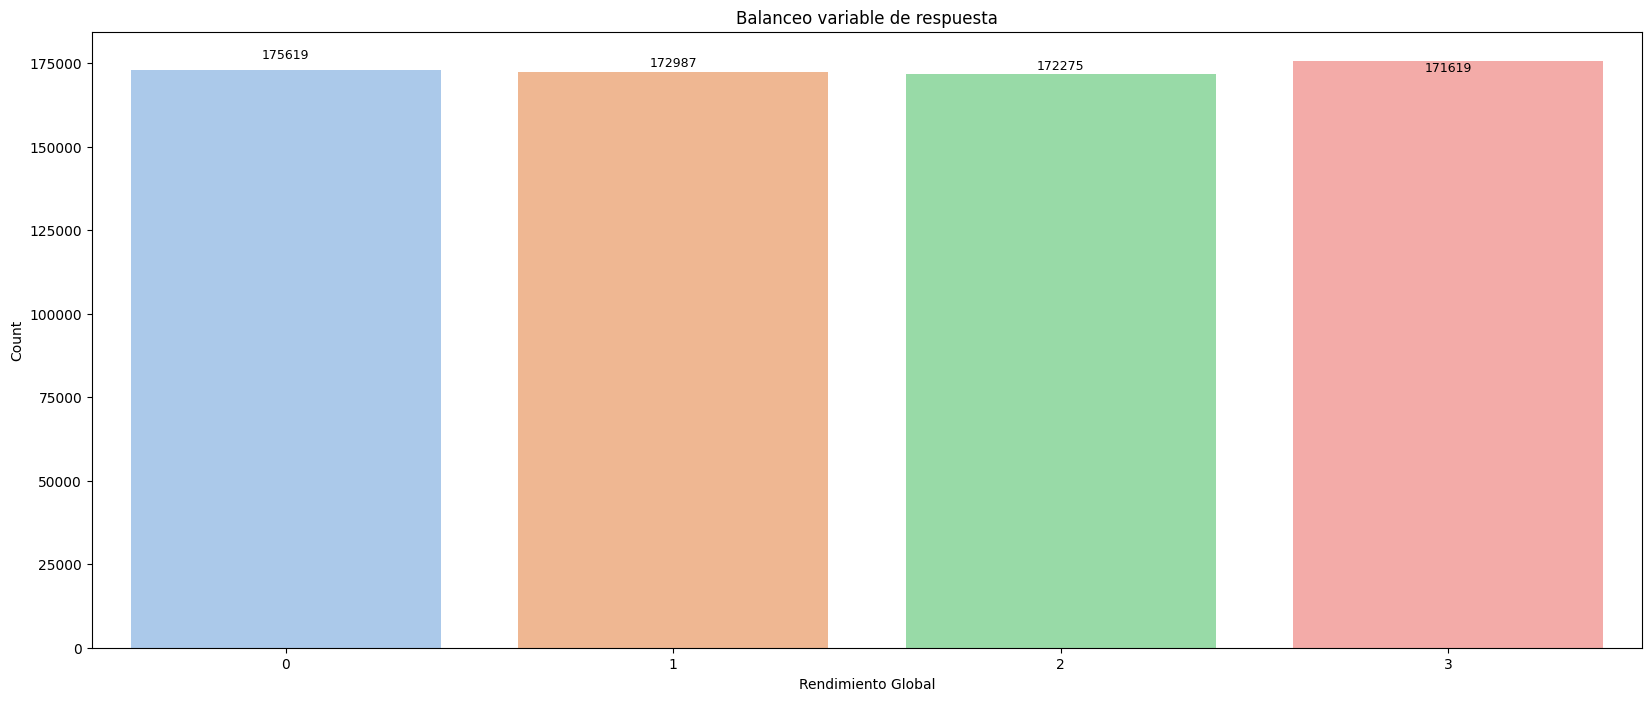

In [ ]:
conteo = df['RENDIMIENTO_GLOBAL'].value_counts()
colores = sns.color_palette('pastel', len(conteo))

plt.figure(figsize=(20, 8))
ax = sns.barplot(x=conteo.index, y=conteo.values, palette=colores)

plt.xlabel('Rendimiento Global')
plt.ylabel('Count')
plt.title('Balanceo variable de respuesta')

for i, v in enumerate(conteo.values):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=9)

plt.show()

No hay desbalanceo de clases presente en la variable objetivo. No es necesario aplicar métodos de balanceo de clases

## <font color='157699'> Preparación y división de datos

In [ ]:
X = df.drop('RENDIMIENTO_GLOBAL', axis=1)
y = df['RENDIMIENTO_GLOBAL']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print('Tamaño del conjunto de entrenamiento: ', X_train.shape)
print('Tamaño del conjunto de validación: ', X_test.shape)

Tamaño del conjunto de entrenamiento:  (554000, 50)
Tamaño del conjunto de validación:  (138500, 50)


# <font color='056938'> Random Forest Classifier

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators = 150,
    criterion    = 'gini',
    n_jobs       = -1,
    random_state = 99,
)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, n_jobs=-1, random_state=99)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
# Calcular accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo Random Forest: {accuracy:.4f}\n")

# Validación cruzada con 5 folds
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Accuracy promedio (cross-validation): {cv_scores.mean():.4f}")

Accuracy del modelo Random Forest: 0.3727

Accuracy promedio (cross-validation): 0.3733


# <font color='056938'> Random Forest con optimización de hiperparámetros

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
}

rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejores hiperparámetros:", best_params)
print("Mejor accuracy promedio (cross-validation):", best_score)

Mejores hiperparámetros: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 300}
Mejor accuracy promedio (cross-validation): 0.40970758167648363


In [ ]:
best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test)
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)

print(f"Accuracy del modelo Random Forest optimizado en el conjunto de validación: {accuracy_optimized:.4f}")

Accuracy del modelo XGBoost optimizado en el conjunto de validación: 0.4094
